# Reading Bronhouderportaal BRO data

This notebook introduces how to use the `hydropandas` package to read, visualise and analyse meta data of newly installed groundwater wells. These meta data is to be submitted to Bronhouderportaal BRO afterwards.

## <a id=top></a>Notebook contents

1. [Read ObsCollection](#readingOC)
2. [Visualise ObsCollection](#visualize)
3. [Analyse ObsCollection](#analyse)

In [1]:
import hydropandas as hpd

import logging
from IPython.display import HTML

import pandas as pd


In [2]:
hpd.util.get_color_logger("INFO")

## Read ObsCollection<a id=readingOC></a>

An `ObsCollection` is created for the multiple monitoring wells.

In [3]:
dirname = "data/bronhouderportaal-bro"
oc = hpd.read_bronhouderportaal_bro(dirname, full_meta=True)
oc

,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,...,tubeStatus,tubeTopPositioningMethod,tubePackingMaterial,tubeMaterial,tubeGlue,sockMaterial,screenLength,plainTubePartLength,sedimentSumpLength,tube_bottom
name,,,,,,,,,,,,,,,,,,,,,
GROND5_B1-1#000-1,56525.207,386749.698,GROND5_B1-1.xml,bronhouderportaal-bro,m NAP,GROND5_B1-1#000,1,-10.64,-11.64,0.36,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,11.50,1.0,-12.64
GROND5_B1-1#000-2,56525.207,386749.698,GROND5_B1-1.xml,bronhouderportaal-bro,m NAP,GROND5_B1-1#000,2,-1.14,-2.14,0.36,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,2.21,1.0,-3.14
GROND5_B1-2#000-1,56336.522,386967.299,GROND5_B1-2.xml,bronhouderportaal-bro,m NAP,GROND5_B1-2#000,1,-9.33,-10.33,1.67,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,11.49,1.0,-11.33
GROND5_B1-2#000-2,56336.522,386967.299,GROND5_B1-2.xml,bronhouderportaal-bro,m NAP,GROND5_B1-2#000,2,0.17,-0.83,1.67,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,2.17,1.0,-1.83
GROND5_B1-3#000-1,56349.209,387156.262,GROND5_B1-3.xml,bronhouderportaal-bro,m NAP,GROND5_B1-3#000,1,-9.70,-10.70,1.30,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,11.44,1.0,-11.70
GROND5_B1-3#000-2,56349.209,387156.262,GROND5_B1-3.xml,bronhouderportaal-bro,m NAP,GROND5_B1-3#000,2,-0.20,-1.20,1.30,...,gebruiksklaar,RTKGPS4tot10cm,filtergrind,pvc,geen,geen,1.0,2.20,1.0,-2.20


## Visualize ObsCollection<a id=visualize></a>

Visualize the `ObsCollection`.

In [10]:
# TO DO: interactive_map() does not support locations without observations
oc.plots.interactive_map()


AttributeError: 'RangeIndex' object has no attribute 'strftime'

INFO:hydropandas.extensions.plots:created sectionplot -> GROND5_B1-3#000-2


(<Figure size 1080x360 with 2 Axes>,
 [<AxesSubplot:ylabel='m NAP'>, <AxesSubplot:ylabel='m NAP'>])

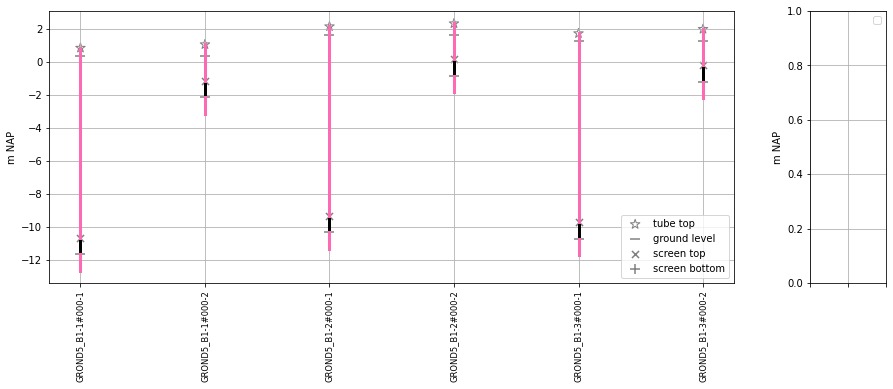

In [5]:
# TO DO: section_plot() now hacked to support locations without observations, but observation axis is still plotted (and empty)
oc.plots.section_plot(plot_obs=False)


## Analyse ObsCollection<a id=analyse></a>

Visualize the `ObsCollection`.

First step is to check which columns have unique values for all wells. E.g. the owner should be the same for all wells. That requires that we drop the `obs` column, beceause `pd.nunique` cannot deal with that specific HydroPandas column-type.

In [6]:
oc_temp = oc.copy().drop(["obs"], axis=1)
oc_unique = oc_temp.iloc[0][oc_temp.columns[oc_temp.nunique() <= 1]]
oc_unique

source                              bronhouderportaal-bro
unit                                                m NAP
metadata_available                                   True
deliveryAccountableParty                              111
qualityRegime                                       IMBRO
deliveryContext                                        WW
constructionStandard                              NEN5766
initialFunction                                     stand
groundLevelStable                                      ja
owner                                                 111
wellHeadProtector                         kokerNietMetaal
horizontalPositioningMethod                RTKGPS5tot10cm
localVerticalReferencePoint                           NAP
deliveredVerticalPosition_offset                      0.0
groundLevelPositioningMethod          tachymetrie0tot10cm
tubeType                                    standaardbuis
artesianWellCapPresent                                 ja
sedimentSumpPr

In [7]:
oc_non_unique = oc[oc.columns.drop(oc_temp.columns[oc_temp.nunique() <= 1])]
oc_non_unique


,x,y,filename,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,obs,objectIdAccountableParty,wellConstructionDate,plainTubePartLength,tube_bottom
name,,,,,,,,,,,,,,
GROND5_B1-1#000-1,56525.207,386749.698,GROND5_B1-1.xml,GROND5_B1-1#000,1,-10.64,-11.64,0.36,0.86,GroundwaterObs GROND5_B1-1#000-1 -----metadata...,B1-1,2020-06-23,11.50,-12.64
GROND5_B1-1#000-2,56525.207,386749.698,GROND5_B1-1.xml,GROND5_B1-1#000,2,-1.14,-2.14,0.36,1.07,GroundwaterObs GROND5_B1-1#000-2 -----metadata...,B1-1,2020-06-23,2.21,-3.14
GROND5_B1-2#000-1,56336.522,386967.299,GROND5_B1-2.xml,GROND5_B1-2#000,1,-9.33,-10.33,1.67,2.16,GroundwaterObs GROND5_B1-2#000-1 -----metadata...,B1-2,2020-06-18,11.49,-11.33
GROND5_B1-2#000-2,56336.522,386967.299,GROND5_B1-2.xml,GROND5_B1-2#000,2,0.17,-0.83,1.67,2.34,GroundwaterObs GROND5_B1-2#000-2 -----metadata...,B1-2,2020-06-18,2.17,-1.83
GROND5_B1-3#000-1,56349.209,387156.262,GROND5_B1-3.xml,GROND5_B1-3#000,1,-9.70,-10.70,1.30,1.74,GroundwaterObs GROND5_B1-3#000-1 -----metadata...,B1-3,2020-06-22,11.44,-11.70
GROND5_B1-3#000-2,56349.209,387156.262,GROND5_B1-3.xml,GROND5_B1-3#000,2,-0.20,-1.20,1.30,2.00,GroundwaterObs GROND5_B1-3#000-2 -----metadata...,B1-3,2020-06-22,2.20,-2.20


In [8]:
# get statistics
oc_non_unique.describe()


,x,y,tube_nr,screen_top,screen_bottom,ground_level,tube_top,wellConstructionDate,plainTubePartLength,tube_bottom
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6,6.000000,6.000000
mean,56403.646000,386957.753000,1.500000,-5.140000,-6.140000,1.110000,1.69500,2020-06-21 00:00:00,6.835000,-7.140000
min,56336.522000,386749.698000,1.000000,-10.640000,-11.640000,0.360000,0.86000,2020-06-18 00:00:00,2.170000,-12.640000
25%,56339.693750,386804.098250,1.000000,-9.607500,-10.607500,0.595000,1.23750,2020-06-19 00:00:00,2.202500,-11.607500
50%,56349.209000,386967.299000,1.500000,-5.235000,-6.235000,1.300000,1.87000,2020-06-22 00:00:00,6.825000,-7.235000
75%,56481.207500,387109.021250,2.000000,-0.435000,-1.435000,1.577500,2.12000,2020-06-22 18:00:00,11.477500,-2.435000
max,56525.207000,387156.262000,2.000000,0.170000,-0.830000,1.670000,2.34000,2020-06-23 00:00:00,11.500000,-1.830000
std,94.331533,181.971242,0.547723,5.238309,5.238309,0.604053,0.60252,NaN,5.084749,5.238309


Check the usage of `tube_nr`. Has tube number one the lowest `screen_bottom` and lowest `screen_top`?

In [9]:
lst_lowest_tube = []
for monitoring_well in oc.monitoring_well.unique():
    oc_mw = oc.loc[oc.monitoring_well == monitoring_well]

    lowest_screen_bottom_tube_nr = oc_mw.loc[
        oc_mw.screen_bottom == oc_mw.screen_bottom.min(), "tube_nr"
    ].values[0]

    lowest_screen_top_tube_nr = oc_mw.loc[
        oc_mw.screen_top == oc_mw.screen_top.min(), "tube_nr"
    ].values[0]

    lst_lowest_tube.append(
        [monitoring_well, lowest_screen_bottom_tube_nr, lowest_screen_top_tube_nr]
    )

df_lowest_tube = pd.DataFrame(
    lst_lowest_tube,
    columns=[
        "monitoring_well",
        "lowest_screen_bottom_tube_nr",
        "lowest_screen_top_tube_nr",
    ],
).set_index("monitoring_well")

df_lowest_tube

,lowest_screen_bottom_tube_nr,lowest_screen_top_tube_nr
monitoring_well,,
GROND5_B1-1#000,1,1
GROND5_B1-2#000,1,1
GROND5_B1-3#000,1,1


## Upload to Bronhouderportaal BRO

Upload the XML-files to Bronhouderportaal BRO via the website.